# Machine Learning Excercise

In [1]:
# Importing main files
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

print(os.listdir("./inputs"))

['train-missings.csv']


In [2]:
# Loading the dataset and printing the first 5 lines
train = pd.read_csv('./inputs/train-missings.csv')
train.head()

,Id,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
0,1,2596.0,NaN,3.0,NaN,0.0,NaN,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,5
1,2,2590.0,56.0,2.0,212.0,NaN,390.0,220.0,NaN,NaN,6225.0,1.0,0.0,0.0,5
2,3,2804.0,NaN,9.0,268.0,65.0,3180.0,NaN,238.0,NaN,6121.0,NaN,0.0,0.0,2
3,4,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,NaN,0.0,2
4,5,2595.0,45.0,NaN,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,5


In [3]:
# The field id could be used as index.
train = train.set_index(['Id'])
# Printing a description of the columns
train.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
count,12156.000000,12188.000000,12096.000000,12071.000000,12083.000000,12057.000000,12151.000000,12035.000000,12073.000000,12152.000000,12031.000000,12031.000000,12198.000000,15120.000000
mean,2746.864676,155.722432,16.525132,226.259796,50.931226,1704.409969,212.594272,219.061903,135.032966,1511.744651,0.239631,0.032250,0.418675,4.000000
std,417.908441,109.820171,8.459560,208.777715,61.161804,1319.590597,30.485857,22.797792,45.789227,1098.104397,0.426876,0.176671,0.493362,2.000066
min,1879.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2371.000000,64.000000,10.000000,67.000000,5.000000,755.000000,196.000000,207.000000,106.000000,726.000000,0.000000,0.000000,0.000000,2.000000
50%,2751.000000,125.000000,15.000000,180.000000,32.000000,1307.000000,220.000000,223.000000,138.000000,1262.500000,0.000000,0.000000,0.000000,4.000000
75%,3101.000000,259.000000,22.000000,324.000000,79.000000,2256.000000,235.000000,236.000000,167.000000,1989.000000,0.000000,0.000000,1.000000,6.000000
max,3849.000000,360.000000,52.000000,1318.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1.000000,1.000000,7.000000


The target is consisting of integers. This is a classification problem.

In [4]:
def getPctMissing(series):
    num = series.isnull().sum()
    den = series.count()
    return 100*(num/den)

getPctMissing(train)

p1        24.383021
p2        24.056449
p3        25.000000
p4        25.258885
p5        25.134486
p6        25.404329
p7        24.434203
p8        25.633569
p9        25.238135
p10       24.423963
p11       25.675339
p12       25.675339
p13       23.954747
target     0.000000
dtype: float64

# Handling missing data

idea for imporvement:
* Use 13 different models to estimate field p1, p2, p3,...,p13

In [5]:
# For now replace missing data with mean of all other values
train = train.fillna(train.mean())
train.describe()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2746.864676,155.722432,16.525132,226.259796,50.931226,1704.409969,212.594272,219.061903,135.032966,1511.744651,0.239631,0.032250,0.418675,4.000000
std,374.711560,98.598200,7.566397,186.541834,54.674921,1178.363546,27.329080,20.339312,40.915833,984.437406,0.380779,0.157593,0.443130,2.000066
min,1879.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2455.000000,79.000000,11.000000,90.000000,10.000000,900.000000,203.000000,212.000000,116.000000,840.000000,0.000000,0.000000,0.000000,2.000000
50%,2746.864676,155.722432,16.525132,226.259796,50.931226,1691.000000,212.594272,219.061903,135.032966,1511.744651,0.000000,0.000000,0.418675,4.000000
75%,2986.250000,208.000000,20.000000,283.000000,65.000000,1959.000000,231.000000,232.000000,159.000000,1766.000000,0.239631,0.000000,1.000000,6.000000
max,3849.000000,360.000000,52.000000,1318.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6853.000000,1.000000,1.000000,1.000000,7.000000


# Feature Selection

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,target
p1,1.000000,-0.014352,-0.252717,0.323405,0.098592,0.459316,0.079701,0.170780,0.072929,0.359389,0.261820,0.209184,0.282043,0.016692
p2,-0.014352,1.000000,0.025326,0.034095,0.052599,0.051376,-0.483347,0.263112,0.511605,-0.049007,-0.109858,0.021428,0.031465,0.011934
p3,-0.252717,0.025326,1.000000,-0.043828,0.207164,-0.217841,-0.162753,-0.488661,-0.261909,-0.186048,-0.110232,-0.059989,-0.091396,0.075395
p4,0.323405,0.034095,-0.043828,1.000000,0.514817,0.162846,-0.025020,0.062173,0.060324,0.124758,-0.017661,0.067909,0.165473,-0.006504
p5,0.098592,0.052599,0.207164,0.514817,1.000000,0.010610,-0.076340,-0.108961,-0.023743,-0.005767,-0.090548,0.018295,0.059650,0.065337
p6,0.459316,0.051376,-0.217841,0.162846,0.010610,1.000000,-0.004611,0.187035,0.140150,0.383087,0.286937,-0.060942,0.089274,-0.093408
p7,0.079701,-0.483347,-0.162753,-0.025020,-0.076340,-0.004611,1.000000,-0.015291,-0.625722,0.064210,0.135527,-0.011750,-0.019455,-0.012104
p8,0.170780,0.263112,-0.488661,0.062173,-0.108961,0.187035,-0.015291,1.000000,0.496176,0.093618,-0.018062,0.029850,0.146140,-0.084578
p9,0.072929,0.511605,-0.261909,0.060324,-0.023743,0.140150,-0.625722,0.496176,1.000000,0.040363,-0.091825,0.035463,0.107050,-0.053625
p10,0.359389,-0.049007,-0.186048,0.124758,-0.005767,0.383087,0.064210,0.093618,0.040363,1.000000,0.341689,0.038287,0.000576,-0.078372


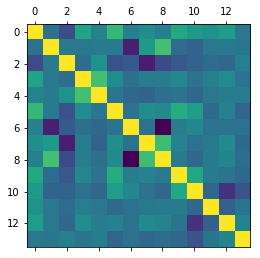

In [6]:
plt.matshow(train.corr())

train.corr()

There is no linear-dependecy among the fields.

In [ ]:
train.var()

The variance of the fields are quiet high, with the exception being p12 and p13 which are still way above the treshhold.

## Final Decision
Given the fact that the dataset is releatively small and that there is no linear dependency among the feautres, I will keep all of the features and won't remove any of them.

## Ideas for improvement of pre_processing:

* Normalize the data

# Modeling the data

We do not have any domain-knowledge. We have to rely on cross-validation in order to find the best possible algorithm. In order to do so, we can start by splitting the data randomly into a test and a training set. I chose 10% of our data as the test set.

In [ ]:
X = train.drop(labels=['target'], axis=1)
y = train.filter(items=['target'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Choosing an algorithm

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


"""
# This takes too long to run, commenting it out in order to achieve faster kernel reboot

names = ["Nearest Neighbors", 
#         "Gaussian Process",
         "Decision Tree", 
         "Random Forest", 
         "Neural Net", 
         "AdaBoost",
         "Naive Bayes", 
         "QDA",
         "Linear SVM", 
         "RBF SVM"
        ]

classifiers = [
    KNeighborsClassifier(3),
#    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1)
    ]



for name, clf in zip(names, classifiers):
    print('Running test for {}'.format(name))
    clf.fit(X_train, y_train)

    print('Accuracy for {} was {}'.format(name ,clf.score(X_test, y_test)))
    del clf
    
"""

True

Running test for Nearest Neighbors

Accuracy for Nearest Neighbors was 0.6276455026455027

Running test for Decision Tree

Accuracy for Decision Tree was 0.5456349206349206

Running test for Random Forest

Accuracy for Random Forest was 0.48478835978835977

Running test for Neural Net

Accuracy for Neural Net was 0.35383597883597884

Running test for AdaBoost

Accuracy for AdaBoost was 0.3683862433862434

Running test for Naive Bayes

Accuracy for Naive Bayes was 0.48544973544973546

Running test for QDA

Accuracy for QDA was 0.5257936507936508

Running test for Linear SVM

Accuracy for Linear SVM was 0.2572654079715914

Running test for RBF SVM

Accuracy for RBF SVM was 0.1252057337281752


## Final Decision

Due to limited memory of my workstation, I could not run Gaussian Process Classifier. 

Given the results above, the best algorithm seems to be Decision Tree

## Improving the Decision Tree


In [ ]:
# Commented out for faster restarts

# The DecisionTree parameters were optimized based on the nature of our data.
# Then I tried different random states to improve the score by a few percents

'''
max_score = 0
max_i = 0
for i in range(100):
    clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=i, presort=True)

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    if score > max_score:
        max_score = score
        max_i = i

print("{} Score {}".format(max_i, max_score))    
'''

True

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=91, presort=True)
clf.fit(X_train, y_train)
print("Score {}".format(clf.score(X_test, y_test)))

In [ ]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump({"model":clf, "means": train.mean()}, f)